## GRIPAPR21, The Sparks Foundation
### Task 2:  Prediction using unsupervised ML
#### Author : Pranay Mitra

### In this task, we predict the optimum number of clusters and represent them visually.

#### Importing the necessary libraries and data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('/Users/pranaymitra/Downloads/Iris.csv')


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


#### Analysing  the data

In [13]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.drop(['Id'],axis='columns',inplace=True)

In [6]:
df.shape

(150, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
df.drop_duplicates(inplace=True)

#### K Means Clustering

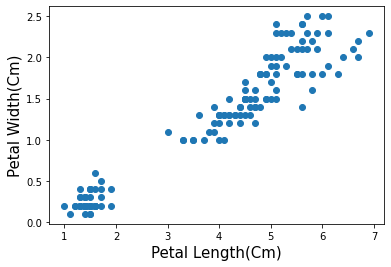

In [85]:
# We plot an initial scatter plot to get an idea about the distribution of the data
plt.scatter(df[['PetalLengthCm']],df[['PetalWidthCm']]) 
plt.xlabel('Petal Length(Cm)',fontsize=15)
plt.ylabel('Petal Width(Cm)',fontsize=15)
plt.show()

#### Fit and training the model

In [102]:
#Coverting the data frame to values and assigning the variable x
x=df.iloc[:,[0,1,2,3]].values 

In [103]:
#Arbitrarily assigning a value, k=4
km4 = KMeans(n_clusters=4)
y_km4 = km4.fit_predict(x)
y_km4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3,
       2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 2, 3, 3,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 2, 2,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2], dtype=int32)

In [104]:
#Values of centroids
km4.cluster_centers_

array([[5.01041667, 3.43125   , 1.4625    , 0.25      ],
       [6.9125    , 3.1       , 5.846875  , 2.13125   ],
       [6.26410256, 2.85897436, 4.80769231, 1.61794872],
       [5.53214286, 2.63571429, 3.96071429, 1.22857143]])

### Elbow Plot
#### This plot will give us the optimum number of clusters for the given data set.

In [105]:
sse=[]
k_range = range(1,11)
for k in k_range:
    km= KMeans(n_clusters=k)
    km.fit(x)
    sse.append(km.inertia_)

In [107]:
sse

[663.8952380952379,
 151.77145833333344,
 77.91989035087717,
 56.642370650183146,
 45.81642192982454,
 38.400902116402136,
 34.128411220043574,
 29.771330051212413,
 28.067895041748763,
 25.679175505050516]

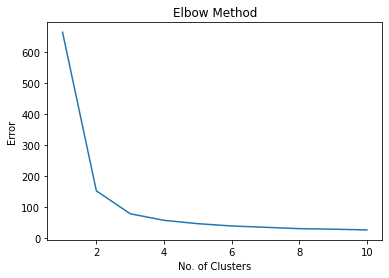

In [108]:
plt.plot(range(1,11),sse)
plt.xlabel('No. of Clusters')
plt.ylabel('Error')
plt.title('Elbow Method')
plt.show()

### The optimal value for k is 3, as the 'elbow' is formed over the value. Now we implement K-Means using k=3

In [109]:
km3=KMeans(n_clusters=3)
y_km3=km3.fit_predict(x)
y_km3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [110]:
km3.cluster_centers_

array([[5.01041667, 3.43125   , 1.4625    , 0.25      ],
       [5.90327869, 2.74918033, 4.38196721, 1.42622951],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [111]:
df[['Cluster']]=y_km3
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,1
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [112]:
df1 = df[df['Cluster']==0]
df2 = df[df['Cluster']==1]
df3 = df[df['Cluster']==2]

### Visualising the clusters - on Petal Length and Petal Width

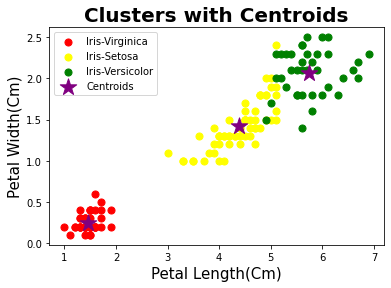

In [114]:
plt.scatter(df1[['PetalLengthCm']],df1[['PetalWidthCm']],s=50,color='red',label='Iris-Virginica')
plt.scatter(df2[['PetalLengthCm']],df2[['PetalWidthCm']],s=50,color='yellow',label='Iris-Setosa')
plt.scatter(df3[['PetalLengthCm']],df3[['PetalWidthCm']],s=50,color='green',label='Iris-Versicolor')

plt.scatter(km3.cluster_centers_[:,2],km3.cluster_centers_[:,3],s=300,color='purple',label='Centroids',marker='*')


plt.title('Clusters with Centroids',fontweight ='bold', fontsize=20)
plt.xlabel('Petal Length(Cm)',fontsize=15)
plt.ylabel('Petal Width(Cm)',fontsize=15)
plt.legend()
plt.show()

### Here we observe that the final plot is similar to the initial plot with the number of optimum clusters = 3